# Task 2

## Task 2.1. Implement a Function that turns from a 8 bit grayscale image to a histogram

In [16]:
import numpy as np

def computeCumHisto(image):
    """
    Berechnet das kumulative Histogramm eines 8-Bit-Graustufenbildes.
    
    Parameter:
    -----------
    image : np.ndarray
        2D-Numpy-Array (dtype=np.uint8), das ein 8-Bit-Graustufenbild repräsentiert.
    
    Rückgabewert:
    -----------
    cum_histo : np.ndarray
        1D-Array mit 256 Elementen, cum_histo[i] enthält die Anzahl aller Pixel,
        deren Intensität <= i ist.
    """
    
    # 1. Histogramm bestimmen: h[i] = Anzahl der Pixel mit Grauwert i
    # Hier zwei Varianten zur Wahl:

    # --- Variante A: Manuelles Zählen mit Schleife ---
    # histogram = np.zeros(256, dtype=int)
    # for row in range(image.shape[0]):
    #     for col in range(image.shape[1]):
    #         val = image[row, col]
    #         histogram[val] += 1

    # --- Variante B: Nutzen von numpy.histogram ---
    histogram, _ = np.histogram(image, bins=256, range=(0, 256))

    # 2. Kumulative Summe bilden -> kumulatives Histogramm
    cum_histo = np.cumsum(histogram)

    return cum_histo

## Task 2.2. Question and Answer

### 1. Homogeneous vs. Non-Homogeneous Point Operations

- **Homogeneous Point Operation:**  
  Applies the same function to every pixel based solely on its intensity. For example, a brightness or contrast adjustment where every pixel undergoes the transformation  
  $$
  g = a \cdot f + b
  $$
  independent of its location.

- **Non-Homogeneous Point Operation:**  
  The transformation depends on both the pixel’s intensity and its spatial position. For example, a brightness adjustment that changes with distance from the image center, so the same intensity may be altered differently in various parts of the image.

### 2. Point Operation vs. Filter Operation

- **Point Operation:**  
  Transforms each pixel independently, using only its own value. Examples include thresholding, gamma correction, and histogram equalization.

- **Filter Operation:**  
  Determines the new pixel value by combining information from a neighborhood of pixels (using a kernel). This approach is used for tasks like smoothing (blurring), sharpening, and edge detection.


## Task 2.3. Implement a function that adjusts Image01 to Image02 using histogram matching. The cumulative histogram of Image02 should serve as the reference distribution, and Image01 should be modified in such a way that its cumulative histogram matches the reference distribution.

In [17]:
def match_Histo(img_histo, ref_histo):
    """
    Erstellt eine Lookup-Tabelle (LUT), um das Histogramm von img_histo
    an das Histogramm von ref_histo anzupassen.
    
    Parameter:
        img_histo (np.ndarray): Histogramm des anzupassenden Bildes.
        ref_histo (np.ndarray): Histogramm des Referenzbildes.

    Rückgabe:
        LUT (np.ndarray): Lookup-Tabelle für die Histogrammanpassung.
    """
    # Schritt 1: Normiere beide Histogramme (Summe = 1)
    img_histo_norm = img_histo.astype(np.float64) / np.sum(img_histo)
    ref_histo_norm = ref_histo.astype(np.float64) / np.sum(ref_histo)

    # Schritt 2: Berechne die kumulativen Histogramme (CDFs)
    cdf_img = np.cumsum(img_histo_norm)
    cdf_ref = np.cumsum(ref_histo_norm)

    # Schritt 3: Erstelle die Lookup-Tabelle
    LUT = np.zeros(256, dtype=np.uint8)
    ref_idx = 0

    for img_idx in range(256):
        # Suche den ersten Wert in cdf_ref, der >= cdf_img[img_idx] ist
        while ref_idx < 255 and cdf_ref[ref_idx] < cdf_img[img_idx]:
            ref_idx += 1
        LUT[img_idx] = ref_idx

    return LUT

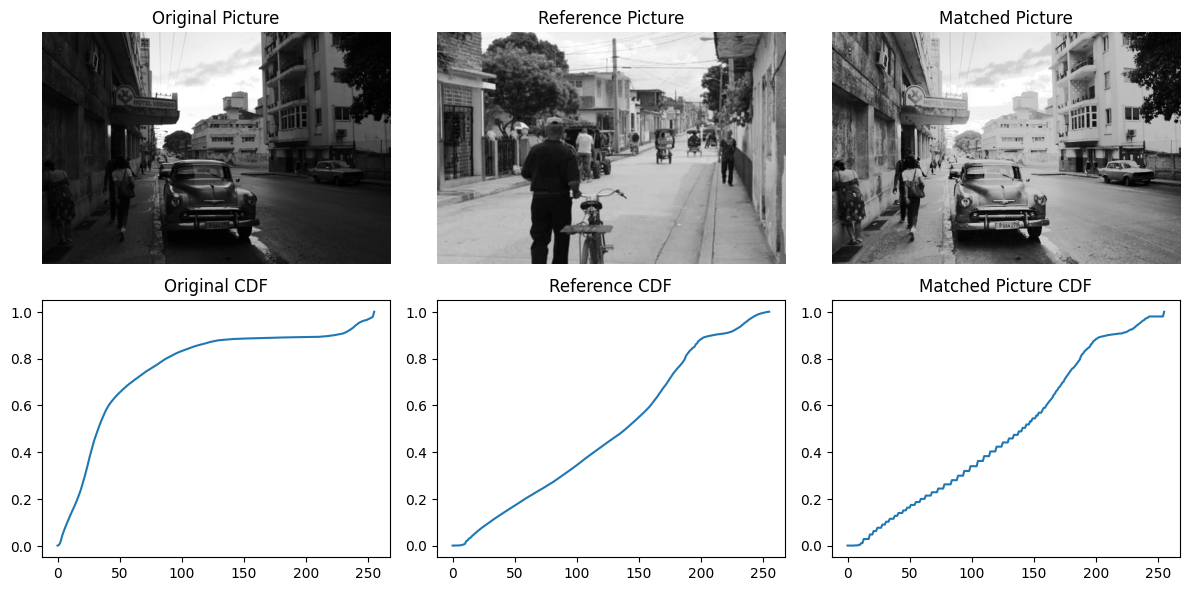

In [22]:
from skimage import io, img_as_ubyte
import matplotlib.pyplot as plt

# Graustufenbilder laden
img = io.imread("bild01.jpg", as_gray=True)
ref = io.imread("bild02.jpg", as_gray=True)

# In 8-bit unsigned Integer konvertieren
img_uint8 = img_as_ubyte(img)
ref_uint8 = img_as_ubyte(ref)

# Histogramme berechnen
img_histo, _ = np.histogram(img_uint8, bins=256, range=(0, 256))
ref_histo, _ = np.histogram(ref_uint8, bins=256, range=(0, 256))

# LUT berechnen und anwenden
LUT = match_Histo(img_histo, ref_histo)
matched = LUT[img_uint8]

# Plots anzeigen
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.title("Original Picture")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Reference Picture")
plt.imshow(ref, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Matched Picture")
plt.imshow(matched, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Original CDF")
plt.plot(np.cumsum(img_histo / img_histo.sum()))

plt.subplot(2, 3, 5)
plt.title("Reference CDF")
plt.plot(np.cumsum(ref_histo / ref_histo.sum()))

plt.subplot(2, 3, 6)
plt.title("Matched Picture CDF")
matched_histo, _ = np.histogram(matched, bins=256, range=(0, 256))
plt.plot(np.cumsum(matched_histo / matched_histo.sum()))

plt.tight_layout()
plt.show()
